In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


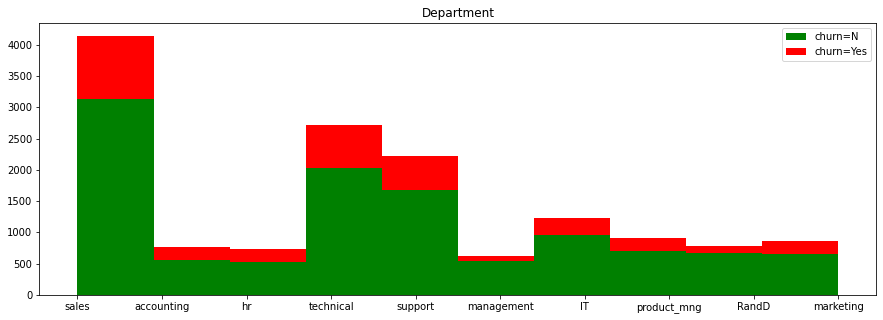

In [75]:
churn_no = df[df.left==0].Department
churn_yes = df[df.left==1].Department
plt.figure(figsize=(15,5))
plt.hist([churn_no,churn_yes],color=['green','red'],label=['churn=N','churn=Yes'],histtype='barstacked')
plt.title('Department')
plt.legend()

In [46]:
df.salary.replace({'low':0,'medium':1,'high':2},inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0


In [47]:
df = pd.get_dummies(data=df,columns=['Department'],drop_first=True)

KeyError: "None of [Index(['Department'], dtype='object')] are in the [columns]"

In [54]:
df2 = df.copy()
from sklearn.preprocessing import MinMaxScaler
df2['average_montly_hours'] = MinMaxScaler().fit_transform(df[['average_montly_hours']])

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df2.drop('left',axis='columns'),df2['left'],test_size=0.2)

In [67]:
model = LogisticRegression().fit(X_train,y_train)

In [68]:
model.score(X_test,y_test)

0.7916666666666666

In [78]:
import pickle
with open('model_hr_evaluation_pickle','wb') as f:
    pickle.dump(model,f)

In [79]:
with open('model_hr_evaluation_pickle','rb') as f:
    model2 = pickle.load(f)

In [80]:
model2.score(X_test,y_test)

0.7916666666666666